<img src='https://user-images.githubusercontent.com/6457691/89746244-a6e2a200-daf3-11ea-9314-7863d544d73c.png' width = '200' align = 'right'>

## *DATA SCIENCE / SECTION 1 / SPRINT 2 / NOTE 4*

# 📝 Assignment

---

# **🌱 기본 과제**

## **Part 1. 데이터 파악**

- **Data Description**
  - **recency** : months since last purchase
  - **history** : value of the historical purchases
  - **used_bogo** : indicates if the customer used a buy one get one before
  - **zip_code** : class of the zip code as Suburban/Urban/Rural
  - **is_referral** : indicates if the customer was acquired from referral channel
  - **channel** : channels that the customer using, Phone/Web/Multichannel
  - **offer** : the offers sent to the customers, But One Get One/No Offer
  - **conversion** : customer conversion(buy or not)

### **1-1. 데이터 준비 및 확인**
- 데이터셋을 불러오세요. 
- 샘플 사이즈를 확인하세요.
  - 샘플 사이즈가 충분한지 확인해 봅니다. 
- 결측치 및 데이터 타입을 확인하세요. 
  - 데이터 타입이 적절한지 확인해 봅니다. 
- 중복된 데이터를 확인 후, 제거하세요. 
  - 중복된 데이터를 제거하여 실제 고객 수를 파악합니다. 

##### **Q1. 중복된 데이터를 제거한 데이터프레임의 row의 총 개수를 쓰세요.**

In [ ]:
# 로컬 파일 업로드 
from google.colab import files
files.upload();

Saving data_new.csv to data_new.csv


In [ ]:
import pandas as pd

In [ ]:
# 데이터셋 불러오기 
df = pd.read_csv('data_new.csv')
df.head(3)

,recency,history,used_bogo,zip_code,is_referral,channel,offer,conversion
0,10,142.44,0,Surburban,0,Phone,Buy One Get One,0
1,6,329.08,1,Rural,1,Web,No Offer,0
2,7,180.65,1,Surburban,1,Web,Buy One Get One,0


In [ ]:
# 샘플 사이즈 확인
df.shape

(42693, 8)

In [ ]:
# 결측치 및 데이터 타입 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42693 entries, 0 to 42692
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   recency      42693 non-null  int64  
 1   history      42693 non-null  float64
 2   used_bogo    42693 non-null  int64  
 3   zip_code     42693 non-null  object 
 4   is_referral  42693 non-null  int64  
 5   channel      42693 non-null  object 
 6   offer        42693 non-null  object 
 7   conversion   42693 non-null  int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 2.6+ MB


In [ ]:
# 중복된 데이터 확인
df.duplicated().sum()

4465

In [ ]:
df = df.drop_duplicates()
df.shape[0]

38228

### **1-2. 이상치 제거**
- `history` 컬럼의 이상치를 확인하세요.
  - box plot으로 데이터의 분포를 나타냅니다. 
  - 더 자세히 살펴보기 위해 histogram을 그려 봅니다.
    - `plt.xlim()`을 사용하여 `history` 값이 700 미만인 데이터들을 시각화 합니다. 
- `history` 값이 700 이상인 값들은 이상치로 간주하여 제거하세요. 

##### **Q2. 이상치를 제거하고 남은 row는 몇 개 인가요?**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

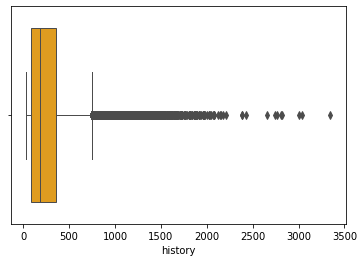

In [ ]:
# boxplot
sns.boxplot(x=df['history'], color = 'orange', linewidth = 1)
plt.show(); 

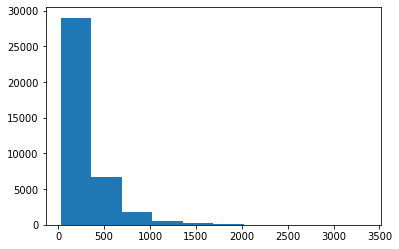

In [ ]:
'''
boxplot에서 history 데이터 값이 큰 부분에 하얀 공간들이 보입니다. 
더 자세히 살펴보기 위해 histogram을 확인합니다. 
'''

plt.hist(df['history']);

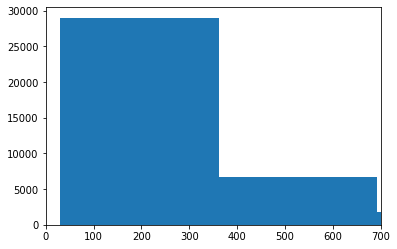

In [ ]:
'''
x축 범위를 0~700으로 지정하여 데이터가 존재하는 부분을 더 자세히 살펴봅니다.
'''

plt.hist(df['history'])
plt.xlim(0, 700);

In [ ]:
# 전체 데이터에서의 비중 확인
outlier = df[df['history'] >= 700]
len(outlier) / len(df)

0.0653447734644763

In [ ]:
'''
700 이상의 값들은 이상치로 간주하여 제거하도록 하겠습니다.
'''

# 이상치 제거 
df = df[df['history'] < 700]

# 통계치 확인
df.describe()

,recency,history,used_bogo,is_referral,conversion
count,35730.000000,35730.000000,35730.000000,35730.000000,35730.000000
mean,5.810663,216.270275,0.544836,0.467674,0.134481
std,3.489717,162.589850,0.497993,0.498961,0.341173
min,1.000000,29.990000,0.000000,0.000000,0.000000
25%,3.000000,84.720000,0.000000,0.000000,0.000000
50%,6.000000,169.450000,1.000000,0.000000,0.000000
75%,9.000000,309.102500,1.000000,1.000000,0.000000
max,12.000000,699.810000,1.000000,1.000000,1.000000


In [ ]:
df.shape[0]

35730

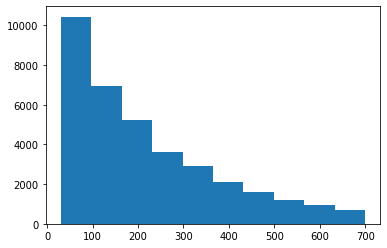

In [ ]:
plt.hist(df['history']);

## **Part 2. AB Test** 

### **2-1. 귀무가설과 대립가설 설정**

주어진 데이터셋에서 `conversion` column은 제품 구매 여부를 의미합니다. <br> 여러분은 1+1 쿠폰을 제공받은 고객의 전환율(conversion rate)이 제공받지 않은 고객의 전환율보다 더 높은지 AB Test를 통해 알아보려고 합니다. 
> **AB Test 결과** <br>
> 만약 귀무가설을 기각하는 데 실패한다면, 1+1 쿠폰이 아닌 다른 마케팅을 검토해 보아야 합니다. <br>
> 하지만 귀무가설을 기각한다면, 마케팅에 1+1 쿠폰을 적극적으로 활용할 수 있을 것입니다. 

- 귀무가설과 대립가설을 설정하세요. 


##### **Q3. 1+1 쿠폰을 제공받은 고객의 전환율을 $\mu_1$, 제공받지 않은 고객의 전환율을 $\mu_0$라고 할 때, 귀무가설은 무엇일까요?**


In [ ]:
!pip install markdown

In [ ]:
import markdown

In [ ]:
@markdown 
H0 : 1+1 쿠폰을 제공받은 고객의 전환율이 제공받지 않은 고객의 전환율과 같거나 더 낮다.
H1 : 1+1 쿠폰을 제공받은 고객의 전환율이 제공받지 않은 고객보다 더 높다. 

### **2-2. 대조군과 실험군의 비율 확인**
- `offer` column에서 1+1 쿠폰을 제공받은 고객(Buy One Get One, 실험군)과 제공받지 않은 고객(No Offer, 대조군)의 비율을 확인하세요. 
- 위에서 구한 비율을 bar plot으로 나타내 보세요. 

##### **Q4. 전체 데이터에 대한 실험군의 비율에서 대조군의 비율을 뺀 값은 얼마인지 반올림하여 소수점 셋째 자리까지 구하세요.**

In [ ]:
# offer 컬럼에서 1+1 쿠폰을 제공받은 고객과 제공받지 않은 고객의 비율
per = df['offer'].value_counts(normalize=True)
per

Buy One Get One    0.501147
No Offer           0.498853
Name: offer, dtype: float64

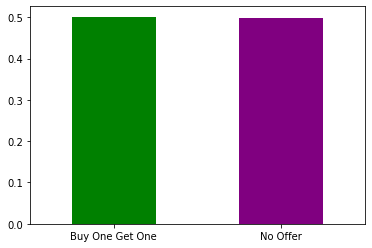

In [ ]:
# bar plot
per.plot.bar(color=['g', 'purple'], rot=0);

In [ ]:
# 두 그룹의 비율의 차
round(per[0] - per[1], 3)

0.002

### **2-3. 전환율(Conversion Rate) 확인** 
  - 전체 데이터셋에서의 전환율을 구하세요.
  - 대조군(control) 그룹(`offer==No Offer`)에서의 전환율을 구하세요.
  - 실험군(experiment) 그룹(`offer==Buy One Get One`)에서의 전환율을 구하세요. 
  - 두 그룹의 전환율 차이(실험군 전환율 $-$ 대조군 전환율)를 변수 `cvr_diff`에 저장하세요. 

##### **Q5. `cvr_diff`를 반올림하여 소수점 셋째 자리까지 쓰세요.**

In [ ]:
# 전체 데이터셋에서의 전환율
cvr_pop = df.conversion.mean()
cvr_pop

0.1344808284354884

In [ ]:
df.groupby('offer').conversion.mean()

offer
Buy One Get One    0.156596
No Offer           0.112264
Name: conversion, dtype: float64

In [ ]:
# 대조군 그룹에서의 전환율
cvr_con = df.groupby('offer').conversion.mean()[1]
cvr_con

0.11226436265709157

In [ ]:
# 실험군 그룹에서의 전환율
cvr_exp = df.groupby('offer').conversion.mean()[0]
cvr_exp

0.1565955545627164

In [ ]:
# 두 그룹의 전환율 차이 
cvr_diff = cvr_exp - cvr_con
cvr_diff

0.04433119190562483

### **2-4. 가설 검정**
**2-3**의 결과는 샘플에서만의 결과입니다. 이제 가설 검정을 통해 샘플에서 얻은 값을 바탕으로 모수를 찾아가도록 합니다. 
- 대조군과 실험군에 속한 고객 수가 몇 명인지 각각 구하세요. 
- `.choice()`를 사용하여 가설검정을 진행한 후 결과를 해석하세요.
  - 대조군 그룹의 귀무가설을 simulate 한 결과를 시각화로 나타내봅니다.
  - 실험군 그룹의 귀무가설을 simulate 한 결과를 시각화로 나타내봅니다.
  - 실험군과 대조군 그룹 평균 차이의 귀무가설을 simulate 한 결과를 시각화로 나타내봅니다.
- Binomial Distribution을 사용하여 가설검정을 진행한 후 결과를 해석하세요.
- Z-test를 사용하여 가설검정을 진행한 후 결과를 해석하세요.

##### **Q6. `.choice()`를 사용하여 가설 검정을 진행한 결과 P-value 값은 얼마인지 구하세요.**

In [ ]:
import numpy as np

In [ ]:
# 대조군 그룹에 속한 고객 수
n_con = df.query('offer=="No Offer"').shape[0]

# 실험군 그룹에 속한 고객 수
n_exp = df.query('offer=="Buy One Get One"').shape[0]

print('대조군 그룹에 속한 고객 수 :', n_con)
print('실험군 그룹에 속한 고객 수 :', n_exp)

대조군 그룹에 속한 고객 수 : 17824
실험군 그룹에 속한 고객 수 : 17906


In [ ]:
# 대조군 그룹의 귀무가설 simulate

no_offer_null = []

for i in range(1000):
    no_offer_sim = np.random.choice([0,1], n_con, p = [1-cvr_pop, cvr_pop], replace=True)
    no_offer_null.append(no_offer_sim.mean())

no_offer_null = np.array(no_offer_null)
no_offer_null_mean = no_offer_null.mean()
no_offer_null_mean

0.13451593357271094

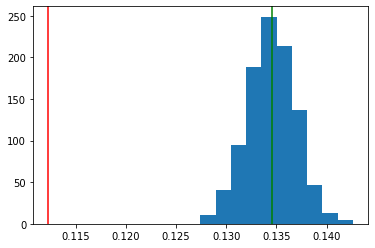

In [ ]:
plt.hist(no_offer_null)
plt.axvline(no_offer_null_mean, color='g')
plt.axvline(cvr_con, color='r');

In [ ]:
# 실험군 그룹의 귀무가설 simulate

bogo_null = []

for i in range(1000):
    bogo_sim = np.random.choice([0,1], n_exp, p = [1-cvr_pop, cvr_pop], replace=True)
    bogo_null.append(bogo_sim.mean())

bogo_null = np.array(bogo_null)

bogo_null_mean = bogo_null.mean()
bogo_null_mean

0.13438891991511226

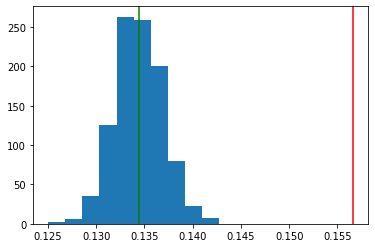

In [ ]:
plt.hist(bogo_null)
plt.axvline(bogo_null_mean, color='g')
plt.axvline(cvr_exp, color='r');

In [ ]:
# 실험군과 대조군 그룹 평균 차이의 귀무가설 Simulate
p_diffs = []

for _ in range(1000):
    bogo_converted = np.random.choice([0,1], n_exp, p = [1-cvr_pop, cvr_pop], replace=True)
    no_offer_converted = np.random.choice([0,1], n_con, p = [1-cvr_pop, cvr_pop], replace=True)
    p_diffs.append(bogo_converted.mean() - no_offer_converted.mean())

p_diffs = np.array(p_diffs)

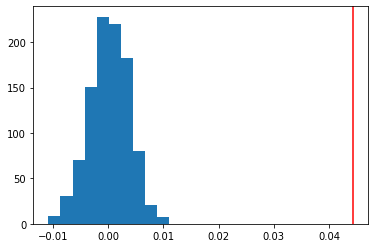

In [ ]:
plt.hist(p_diffs)
plt.axvline(cvr_diff, color='r');

In [ ]:
# p-value
(p_diffs > cvr_diff).mean()

0.0

In [ ]:
# 결과 해석
@markdown
두 그룹의 차이를 simulate한 분포에서 cvr_diff보다 큰 부분의 면적, 즉 pvalue 값이 0이므로 귀무가설을 기각하고 대립가설을 채택한다. 
따라서 1+1 쿠폰을 제공받은 고객의 전환율이 제공받지 않은 고객의 전환율보다 높다는 것이 통계적으로 유의미하다고 볼 수 있다. 

##### **Q7. Binomial Distribution을 사용하여 가설 검정을 진행한 결과 P-value 값은 얼마인지 구하세요.**

In [ ]:
# binomial distribution 
exp_converted_sim = np.random.binomial(n_exp, cvr_pop, 10000)/n_exp
con_converted_sim = np.random.binomial(n_con, cvr_pop, 10000)/n_con
p_diffs = exp_converted_sim - con_converted_sim 

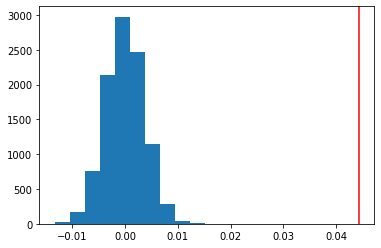

In [ ]:
plt.hist(p_diffs)
plt.axvline(cvr_diff, color='r');

In [ ]:
# binomial p-value
(p_diffs > cvr_diff).mean()

0.0

In [ ]:
# 결과 해석
@markdown
두 그룹 차이의 sampling distribution에서의 면적이 threshold 0.05보다 작으므로 귀무가설을 기각하고 대립가설을 채택한다. 

##### **Q8. Z-test를 사용하여 가설 검정을 진행한 결과 P-value 값은 얼마인지 소수점 둘째 자리까지 구하세요.**

In [ ]:
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# z-test
con_conversion = df.query('offer == "No Offer"').conversion.sum()
exp_conversion = df.query('offer == "Buy One Get One"').conversion.sum()

In [ ]:
con_conversion, exp_conversion

(2001, 2804)

In [ ]:
n_con, n_exp

(17824, 17906)

In [ ]:
z_score, p_value = sm.stats.proportions_ztest([con_conversion, exp_conversion], [n_con, n_exp], alternative='smaller')

In [ ]:
'''
In the two sample test, 
smaller means that the alternative hypothesis is p1 < p2 and 
larger means p1 > p2 
where p1 is the proportion of the first sample and p2 of the second one.
'''

In [ ]:
# z-test p-value
round(p_value, 2)

0.0

In [ ]:
# 결과 해석
@markdown 
P-value 값이 0.05보다 매우 작으므로 귀무가설을 기각하고 대립가설을 채택한다.

# **🥇 도전 과제**



## **Part 3. ANOVA**

우리는 지금까지 한 표본 또는 두 표본에 대해서 가설검정을 시행해 보았습니다.

그렇다면 표본이 세 개 이상일 때는 어떻게 가설검정을 할 수 있을까요? 

</br>

**다음 [링크](https://partrita.github.io/posts/ANOVA-python/)를 통해 ANOVA에 대한 글을 읽고, 주어진 4개 그룹의 평균에 대하여 차이가 있는지 가설검정을 시행하세요.** 


```
A : 38 33 35 92 76 97 88 41 11 9
B : 18 52 62 48 30 40 87 12 97 82
C : 28 90 5 49 66 73 96 80 4 17
D : 8 99 4 12 7 64 18 10 9 20
```

In [ ]:
import scipy.stats as stats
import numpy as np
import pandas as pd

a = [38, 33, 35, 92, 76, 97, 88, 41, 11, 9]
b = [18, 52, 62, 48, 30, 40, 87, 12, 97, 82]
c = [28, 90, 5, 49, 66, 73, 96, 80, 4, 17]
d = [8, 99, 4, 12, 7, 64, 18, 10, 9, 20]

In [ ]:
@markdown
H_0: 4개 그룹의 평균의 차이는 통계적으로 유의하지 않다.
H_a: 4개 그룹의 평균의 차이는 통계적으로 유의하다.

In [ ]:
df = pd.DataFrame({'a':a, 'b':b, 'c':c, 'd':d}).reset_index()
df

,index,a,b,c,d
0,0,38,18,28,8
1,1,33,52,90,99
2,2,35,62,5,4
3,3,92,48,49,12
4,4,76,30,66,7
5,5,97,40,73,64
6,6,88,87,96,18
7,7,41,12,80,10
8,8,11,97,4,9
9,9,9,82,17,20


In [ ]:
df1 = df.copy()

df1 = pd.melt(df1, id_vars=['index'], value_vars=['a','b','c','d'], var_name='group', value_name='score').drop(labels=['index'], axis=1)
df1.head()

,group,score
0,a,38
1,a,33
2,a,35
3,a,92
4,a,76


In [ ]:
pip install pingouin

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 185 kB 28.0 MB/s 
     |████████████████████████████████| 9.8 MB 32.6 MB/s 
  Created wheel for pingouin: filename=pingouin-0.5.2-py3-none-any.whl size=196206 sha256=96ede41cc5f563bf2cf2c80282973d269e6b5dfe65b3400c24cc35fe43e0af88
  Stored in directory: /root/.cache/pip/wheels/11/5a/63/a6d32fc26fa462c731f65480bfb98ff7bd39b8ebcb4bc6c2fe
  Created wheel for littleutils: filename=littleutils-0.2.2-py3-none-any.whl size=7048 sha256=69f5e3ab710045a449c936ebeabe8c691eb0a59c1ca27e61dfe45c6af54c103f
  Stored in directory: /root/.cache/pip/wheels/d6/64/cd/32819b511a488e4993f2fab909a95330289c3f4e0f6ef4676d
Successfully built pingouin littleutils
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [ ]:
# 등분산성 검정
import pingouin as pg
pg.homoscedasticity(dv = 'score', group = 'group', data = df1)

,W,pval,equal_var
levene,0.629807,0.600532,True


In [ ]:
# 정규성 검정

A = df1[df1['group'] == 'a'].score
B = df1[df1['group'] == 'b'].score
C = df1[df1['group'] == 'c'].score
D = df1[df1['group'] == 'd'].score

li = [A, B, C, D]
for i in li:
  print(stats.shapiro(i))

ShapiroResult(statistic=0.8855863213539124, pvalue=0.15115493535995483)
ShapiroResult(statistic=0.9557753205299377, pvalue=0.7368385791778564)
ShapiroResult(statistic=0.9083371162414551, pvalue=0.2697630524635315)
ShapiroResult(statistic=0.6758819818496704, pvalue=0.00045000086538493633)


In [ ]:
# ANOVA 검정 (일원분산분석)
pg.anova(dv = 'score', between = 'group', data = df1)

,Source,ddof1,ddof2,F,p-unc,np2
0,group,3,36,1.724959,0.179209,0.12568


In [ ]:
# Stat 메서드 사용 ANOVA 검정
stats, pval = stats.f_oneway(a, b, c, d)

pval

0.17920877113948797

In [ ]:
@markdown
일원분산분석 결과 p-value가 0.05보다 크므로, 4개 그룹의 평균값의 차이가 통계적으로 유의하지 않다고 할 수 있습니다.

In [ ]:
# 정규성 가정 X -> Kruskal-Waliis test
stats.kruskal(A, B, C, D)

KruskalResult(statistic=5.550774284373547, pvalue=0.13563309671114496)